# **Data Pre-processing**

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [3]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [4]:
data_backup = data
data_backup

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [5]:
data.columns.tolist()

['Unnamed: 0',
 'Use Case',
 'LTE/5g Category',
 'Technology Supported',
 'Day',
 'Time',
 'GBR',
 'Packet Loss Rate',
 'Packet delay',
 'slice Type']

In [6]:
data['LTE/5g Category'].value_counts()

,count
LTE/5g Category,
2,3024
3,3024
5,3024
4,3024
6,3024
7,3024
15,3024
8,3024
9,3024


In [7]:
data['Technology Supported'].value_counts()

,count
Technology Supported,
LTE/5G,33599
"IoT(LTE-M, NB-IoT)",29568


In [8]:
data = data.drop(data.columns[0], axis=1)
data

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...
63162,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [9]:
data = data.drop(['LTE/5g Category','Day','Time'], axis=1)
data

,Use Case,Technology Supported,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
1,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
2,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
3,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
4,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...
63162,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC


### **Data Distribution by "Use Case"**

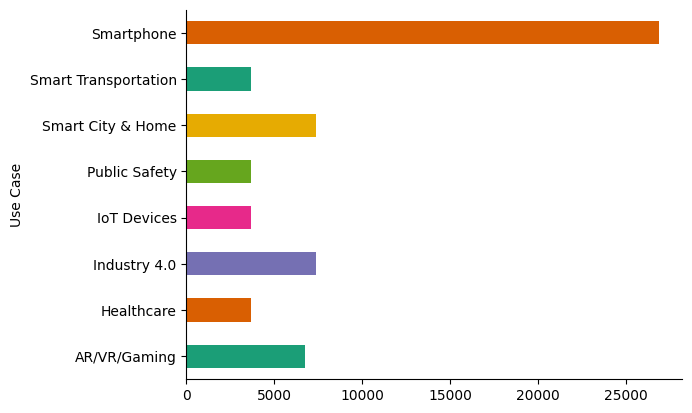

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Use Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Conversion of Feature Columns (Categorial to Numerical)**

using one-hot encoding

In [11]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Use Case', 'Technology Supported', 'GBR'])
one_hot_encoded_data

,Packet Loss Rate,Packet delay,slice Type,Use Case_AR/VR/Gaming,Use Case_Healthcare,Use Case_Industry 4.0,Use Case_IoT Devices,Use Case_Public Safety,Use Case_Smart City & Home,Use Case_Smart Transportation,Use Case_Smartphone,"Technology Supported_IoT(LTE-M, NB-IoT)",Technology Supported_LTE/5G,GBR_GBR,GBR_Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [12]:
data_ohe = one_hot_encoded_data.rename(columns={'Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data_ohe

,Packet Loss Rate,Packet delay,slice Type,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [13]:
data = data_ohe[['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]
data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
1,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
2,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
3,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
4,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63163,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63164,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63165,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC


In [14]:
# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ["IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data[column] = data[column].replace({False: 0, True: 1})

data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC


### **Class Distribution Analysis**

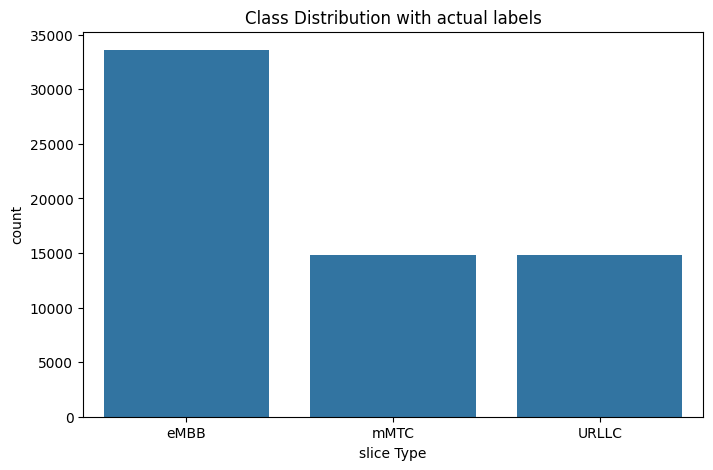

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

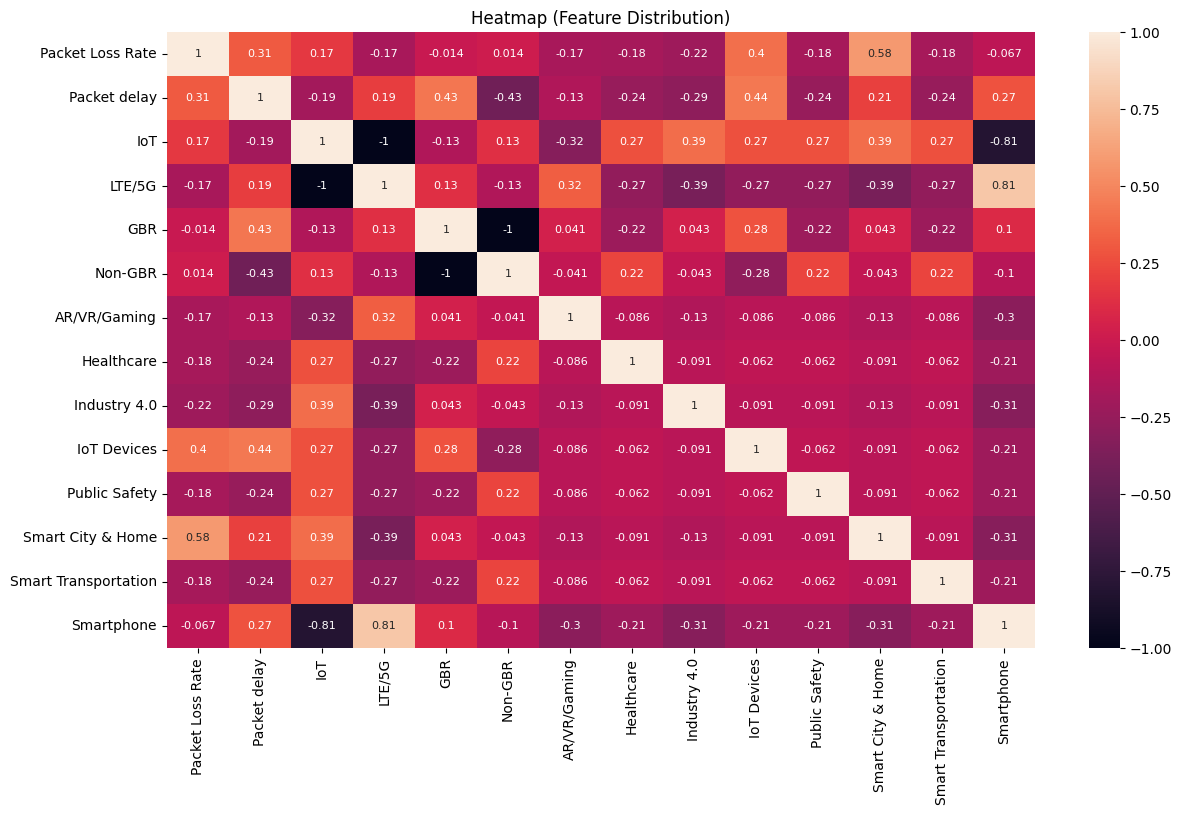

In [16]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

In [17]:
# Random Seed for Under-sampling, Data-split and Modeling
a = 42
b = 42
c = 42

In [18]:
print(a)

42


### **Relevant Feature Selection**

In [19]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

#### Heatmaps

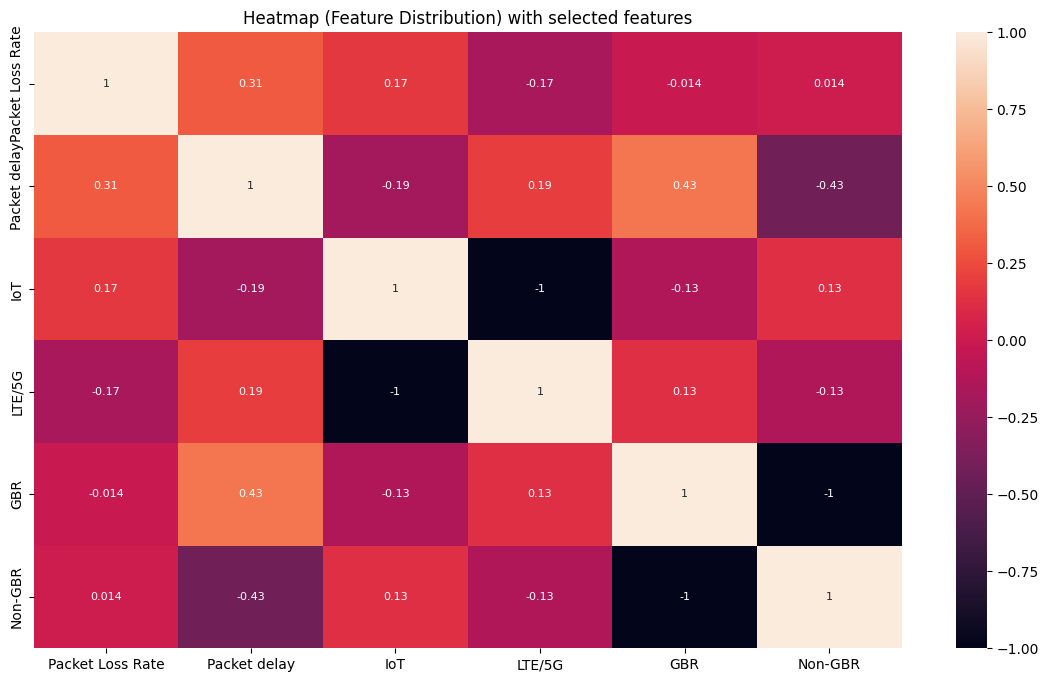

In [20]:
# Create a heatmap for the correlation matrix of all selected features
plt.figure(figsize=(14, 8))
sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) with selected features')
plt.show()

# **Data Split**

### **Define X and y**

In [21]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1
63163,0.000001,10,1,0,0,1
63164,0.000001,10,1,0,0,1
63165,0.000001,10,1,0,0,1


In [22]:
y = data['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
63162,URLLC
63163,URLLC
63164,URLLC
63165,URLLC


### **Define Unlabelled and Labelled Dataset**

In [23]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_labelled, X_unlabelled, y_labelled, y_unlabelled = train_test_split(X,y, train_size=0.0001, random_state=b)

In [24]:
X_labelled

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
54343,0.010000,300,1,0,1,0
62570,0.000001,10,1,0,0,1
38158,0.000001,10,1,0,0,1
860,0.010000,100,0,1,0,1
15795,0.000001,300,0,1,0,1
56422,0.010000,50,1,0,0,1


In [25]:
X_unlabelled

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
27189,0.001000,50,0,1,0,1
54980,0.010000,300,1,0,1,0
22142,0.000001,60,0,1,1,0
28289,0.001000,50,0,1,0,1
61715,0.000001,10,1,0,0,1
...,...,...,...,...,...,...
16850,0.010000,75,0,1,0,1
6265,0.000001,100,0,1,1,0
54886,0.010000,300,1,0,1,0
11284,0.001000,100,0,1,1,0


# **Data Modelling and Analysis**

## **Base Model Training**

In [26]:
print(c)

42


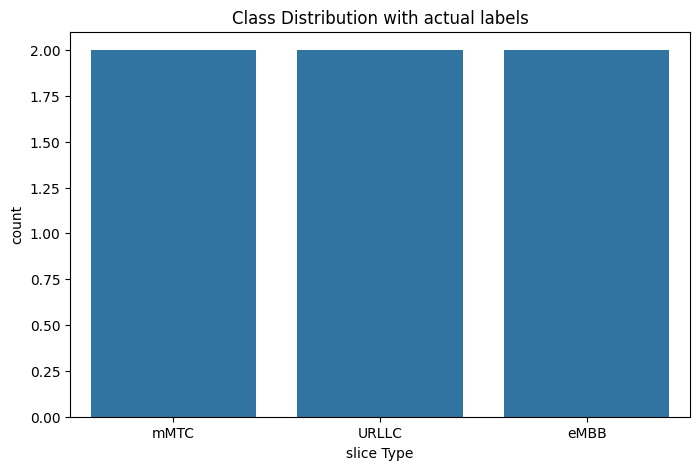

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_labelled)
plt.title('Class Distribution with actual labels')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_RFC_base = RandomForestClassifier()
model_RFC_base.fit(X_labelled, y_labelled)

RandomForestClassifier()

## **Pseudo Label Creation**

In [30]:
pseudo_labels = model_RFC_base.predict(X_unlabelled)

In [31]:
accuracy_RFC = accuracy_score(y_unlabelled, pseudo_labels)
print(f"Accuracy: {accuracy_RFC:.2f}")

Accuracy: 1.00


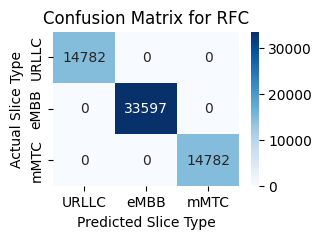

In [32]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_unlabelled, pseudo_labels)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

## **New Dataset Creation**

In [33]:
# Get the column names from the original DataFrame
X_unlabelled_column_names = X_unlabelled.columns.tolist()
X_unlabelled_column_names

['Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR']

In [34]:
pseudo_labels

array(['eMBB', 'mMTC', 'eMBB', ..., 'mMTC', 'eMBB', 'URLLC'], dtype=object)

In [35]:
# Convert X_unlabelled to a pandas DataFrame
X_unlabelled_df_RFC = pd.DataFrame(X_unlabelled, columns=X_unlabelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_unlabelled_with_pseudo_labels_RFC = X_unlabelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_unlabelled_with_pseudo_labels_RFC.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# pseudo_labels = pd.Series(pseudo_labels, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_unlabelled_with_pseudo_labels_RFC['slice Type'] = pseudo_labels

X_unlabelled_with_pseudo_labels_RFC

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,slice Type
0,0.001000,50,0,1,0,1,eMBB
1,0.010000,300,1,0,1,0,mMTC
2,0.000001,60,0,1,1,0,eMBB
3,0.001000,50,0,1,0,1,eMBB
4,0.000001,10,1,0,0,1,URLLC
...,...,...,...,...,...,...,...
63156,0.010000,75,0,1,0,1,eMBB
63157,0.000001,100,0,1,1,0,eMBB
63158,0.010000,300,1,0,1,0,mMTC
63159,0.001000,100,0,1,1,0,eMBB


In [36]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR']

In [37]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df_RFC = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_labelled_with_labels_RFC = X_labelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_labelled_with_labels_RFC.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_labelled_with_labels_RFC['slice Type'] = y_labelled

X_labelled_with_labels_RFC

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,slice Type
0,0.010000,300,1,0,1,0,mMTC
1,0.000001,10,1,0,0,1,URLLC
2,0.000001,10,1,0,0,1,URLLC
3,0.010000,100,0,1,0,1,eMBB
4,0.000001,300,0,1,0,1,eMBB
5,0.010000,50,1,0,0,1,mMTC


In [38]:
data_new = pd.concat([X_labelled_with_labels_RFC, X_unlabelled_with_pseudo_labels_RFC], ignore_index=True)
data_new

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,slice Type
0,0.010000,300,1,0,1,0,mMTC
1,0.000001,10,1,0,0,1,URLLC
2,0.000001,10,1,0,0,1,URLLC
3,0.010000,100,0,1,0,1,eMBB
4,0.000001,300,0,1,0,1,eMBB
...,...,...,...,...,...,...,...
63162,0.010000,75,0,1,0,1,eMBB
63163,0.000001,100,0,1,1,0,eMBB
63164,0.010000,300,1,0,1,0,mMTC
63165,0.001000,100,0,1,1,0,eMBB


### **New Classifier Model Training**

In [39]:
X = data_new[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,300,1,0,1,0
1,0.000001,10,1,0,0,1
2,0.000001,10,1,0,0,1
3,0.010000,100,0,1,0,1
4,0.000001,300,0,1,0,1
...,...,...,...,...,...,...
63162,0.010000,75,0,1,0,1
63163,0.000001,100,0,1,1,0
63164,0.010000,300,1,0,1,0
63165,0.001000,100,0,1,1,0


In [40]:
y = data_new['slice Type']
y

,slice Type
0,mMTC
1,URLLC
2,URLLC
3,eMBB
4,eMBB
...,...
63162,eMBB
63163,eMBB
63164,mMTC
63165,eMBB


In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
12038,0.001000,150,0,1,0,1
54602,0.001000,150,0,1,0,1
9061,0.001000,100,0,1,1,0
36644,0.000001,10,1,0,0,1
29003,0.001000,50,1,0,1,0
...,...,...,...,...,...,...
62570,0.001000,50,0,1,0,1
38158,0.000001,300,0,1,1,0
860,0.000001,60,0,1,1,0
15795,0.000001,10,1,0,0,1


In [42]:
X_test

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
27189,0.000001,10,1,0,0,1
54980,0.000001,10,1,0,0,1
22142,0.010000,100,0,1,0,1
28289,0.000001,60,0,1,1,0
61715,0.010000,300,1,0,1,0
...,...,...,...,...,...,...
15832,0.001000,100,0,1,1,0
20831,0.010000,300,1,0,1,0
49363,0.000001,60,0,1,1,0
6383,0.001000,100,0,1,1,0


In [43]:
model_RFC_new = RandomForestClassifier()
model_RFC_new.fit(X_train, y_train)

RandomForestClassifier()

# **Model Testing**

In [44]:
# Predict the labels for the test data
y_pred = model_RFC_new.predict(X_test)
y_pred

array(['URLLC', 'URLLC', 'eMBB', ..., 'eMBB', 'eMBB', 'mMTC'],
      dtype=object)

## **Update testing dataset with labels**

In [45]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [46]:
# Display the Updated Table
X_test_with_labels[:20]

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,actual_label,predicted_label
0,0.000001,10,1,0,0,1,URLLC,URLLC
1,0.000001,10,1,0,0,1,URLLC,URLLC
2,0.010000,100,0,1,0,1,eMBB,eMBB
3,0.000001,60,0,1,1,0,eMBB,eMBB
4,0.010000,300,1,0,1,0,mMTC,mMTC
5,0.010000,300,1,0,1,0,mMTC,mMTC
6,0.010000,75,0,1,0,1,eMBB,eMBB
7,0.010000,300,1,0,1,0,mMTC,mMTC
8,0.001000,100,0,1,1,0,eMBB,eMBB
9,0.010000,50,1,0,0,1,mMTC,mMTC


## **Predicted Label Analysis**

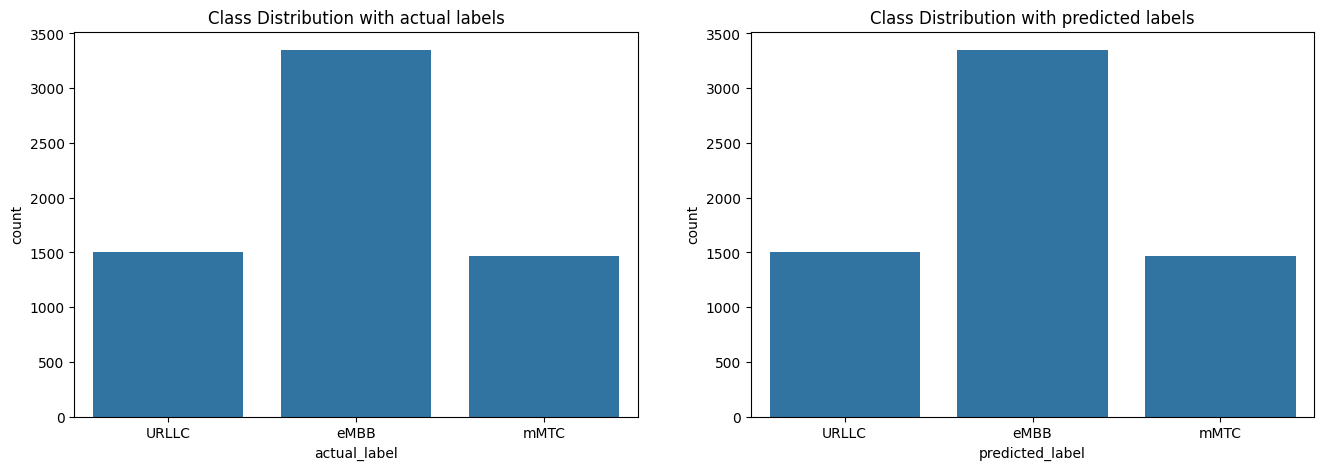

In [47]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

### **Confusion Matrix**

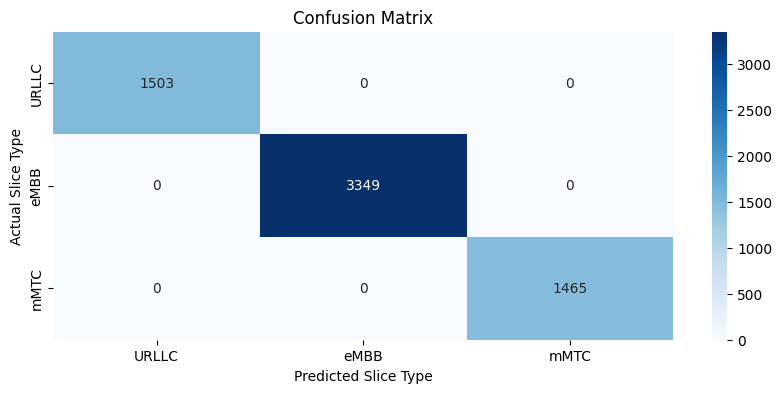

In [48]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()
# print("\n", a, b, c)

In [49]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 1.0
Precision 1.0
Recall 1.0
F1-score 1.0


In [50]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.22622434214414802


In [51]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 3.2462825476593125


In [52]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 1.0


# **SYNC NOTEBOOKS**

In [54]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp11 - Slice_Identification_SemiSupML_Self-Training.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Exp11 - Slice_Identification_SemiSupML_Self-Training.ipynb': No such file or directory
